<a href="https://colab.research.google.com/github/jansoe/AICA/blob/main/Super_Basic_Image_Classification_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A simple Artifical Neural Network

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

## The Data


Our toy data: The MNIST dastaset (handwritten digit recognition)

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# scaling the pixel values to the range (-1, 1) 
train_images = (train_images/255 - 0.5) * 2
test_images = (test_images/255 - 0.5) * 2

11490434/11490434 [==============================] - 2s 0us/step


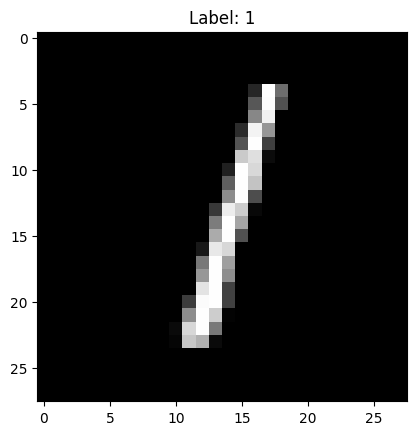

In [ ]:
_ = plt.imshow(test_images[2], cmap=plt.cm.gray)
_ = plt.title('Label: %s'%test_labels[2])

In [ ]:
train_images.shape

(60000, 28, 28)

The training data conatins 60.000 samples of handwritten digits. 
The data is inherently 2D (28x28 pixel).

For our first network we will create now a simple 1D-Vector by flattening the images and thus discarding the 2D neighbourhood structure.

In [ ]:
train_images_flat = train_images.reshape((-1, 28*28))
test_images_flat = test_images.reshape((-1, 28*28))

train_images_flat.shape

(60000, 784)

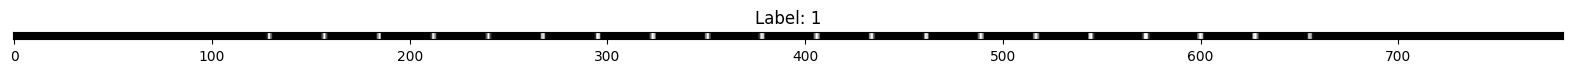

In [ ]:
plt.figure(figsize=(20,0.1))
_ = plt.imshow(test_images_flat[2].reshape(1, -1), cmap=plt.cm.gray, aspect='auto')
_ = plt.title('Label: %s'%test_labels[2])
_ = plt.yticks([])

## The most simple Network 

All features (pixel values) are mapped to probabilities for all 10 labels



In [ ]:
# A Dense Layer ist an all-to-all conection of input and output neurons
out_layer = tf.keras.layers.Dense(
    input_shape=(784,),             
    units=10,                      # output: 10 units for 10 categories
    activation='softmax',          # softmax-activation, so that probabilities sum up to 1
    name = 'probabilities'
)

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(out_layer)

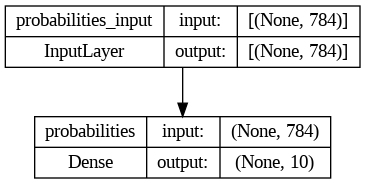

In [ ]:
tf.keras.utils.plot_model(model1, show_shapes=True)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 probabilities (Dense)       (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


For training the model we need to specify the loss to minimize, and the procedure to do this.

For our case of `multiclass-classification` we can use the loss of `categorical_crossentropy`, which measures how many bits of uncertainty are left to obtain the true labels given our prediction.

We use **sparse**`_categorical_crossentropy` because our labels are encoded sparse i.e. as integers 0,1,..,9 and not as binary **one-hot** labels: (1,0,0,0,0,0,0,0,0,0,0), (0,1,0,0,0,0,0,0,0,0,0), ...,  (0,0,0,0,0,0,0,0,0,0,1)

In [ ]:
model1.compile(
    loss = 'sparse_categorical_crossentropy', 
    optimizer = 'SGD',      # optimization procdure
    metrics = ['accuracy']  # Monitoring training
)

Now we can fit our data to the model

In [ ]:
history = model1.fit(
    x = train_images_flat, 
    y = train_labels,
    batch_size = 16,
    validation_data = (test_images_flat, test_labels),
    epochs = 20  # one epoche is one sweep through the training data
)

Epoch 1/20
3750/3750 [==============================] - 14s 3ms/step - loss: 0.4501 - accuracy: 0.8689 - val_loss: 0.3201 - val_accuracy: 0.9085
Epoch 2/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3301 - accuracy: 0.9046 - val_loss: 0.3034 - val_accuracy: 0.9114
Epoch 3/20
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3114 - accuracy: 0.9105 - val_loss: 0.3087 - val_accuracy: 0.9125
Epoch 4/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3010 - accuracy: 0.9143 - val_loss: 0.2893 - val_accuracy: 0.9162
Epoch 5/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.2946 - accuracy: 0.9156 - val_loss: 0.2873 - val_accuracy: 0.9171
Epoch 6/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.2894 - accuracy: 0.9185 - val_loss: 0.2871 - val_accuracy: 0.9193
Epoch 7/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.2872 - accuracy: 0.9193 - val_loss: 0.2820 - val_accu

In [ ]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylim([.8, .95])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

## Getting Deeper  

Additional `hidden layers` increase complexity and thus expressiveness of the network.

In [ ]:
hidden_layer = tf.keras.layers.Dense( 
    input_shape = (28*28,), 
    units=200,            # 200 units als intermediate-output
    activation = 'relu',  # one of the most popular activation functions 
    name = 'hidden'
) 

In [ ]:
# unser outputlayer wie oben
out_layer = tf.keras.layers.Dense( 
    units=10,                      
    activation='softmax',  
    name= 'out'
)

In [ ]:
model2 = tf.keras.models.Sequential()

model2.add(hidden_layer)
model2.add(out_layer)

model2.compile(
    loss = 'sparse_categorical_crossentropy',  # Klassifizierungsfehler
    metrics = ['accuracy'],  # Anteil korrekt klassifizierter Samples des Validierungsdatensatzes
)

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
model2.summary()

In [ ]:
history = model2.fit(
    x = train_images_flat, 
    y = train_labels,
    validation_data = (test_images_flat, test_labels),
    epochs = 20
)


### Experiments Suggestions
Observe the train and validation error 
- in/decrease the number of neurons in the `hidden layer` (getting wider)
- with a second `hidden layer 2` (getting deeper) 
